# RedLab/Hack
## Разработка модели для выявления аномалий во временном ряду

# Содержание
1. Описание проекта
2. Предлагаемое решение

# 1. Описание проекта

Простои в работе современных ИТ-систем стоят очень дорого. Для того, чтобы их избежать, системы мониторинга должны помогать людям выявлять
странности в поведении системы на основании собираемых данных телеметрии и своевременно оповещать о них операторов и техническую команду.

Для решения этой задачи разработан прототип сервиса, который анализирует временной ряд и размечает выявленные аномалии в данных.

**Аномалия** — отклонение от нормы, от общей закономерности, неправильность. Применительно к ИТ-системе, аномалией считается отклонение
от нормального поведения всей системы или ее отдельной части. Важно понимать, что аномалия это не частое явление в ИТ-системах
и его невозможно четко формализовать, т.к. это любое отклонение от нормального поведения.

Также, данные могут иметь сезонный характер и тренды. Это не должно
учитываться как аномалия.

**Вводные данные** - слепок данных телеметрии реальной системы за месяц работы с шагом в 1 минуту для анализа и обучения модели. 
Для проверки результата будет предоставлен тестовый набор данных.

Оценить точность решения можно через Numenta Anomaly Score (часть Numenta Anomaly Benchmark)

[Dataset](https://drive.google.com/drive/folders/1ym_jj7Q2siG8EQ2ZcV-et6F1KdK6-olU)

<table>
  <caption>
    Критерии оценивания
  </caption>
  <thead>
    <tr>
      <th>Критерий</th>
      <th>Описание</th>
      <th>Шкала</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Работоспособность прототипа</td>
      <td>
        Оценка работоспособности решения. Разработанное решение должно
        функционировать, запускаться и выдавать требуемый результат. Мелкие
        ошибки допустимы, а также частично реализованный функционал.
      </td>
      <td>1-10</td>
    </tr>
    <tr>
      <td>Соответствие функциональным требованиям</td>
      <td>
        Проверяется соответствие созданного решения поставленной задаче в
        описании кейса, в полной мере ли реализована задача. Насколько
        предложенное решение закрывает выявленную проблему; Дополнительный
        функционал решения.
      </td>
      <td>1-10</td>
    </tr>
    <tr>
      <td>Технологичность</td>
      <td>
        Оценивается качество исходного кода и подходы к разработке. Уникальность
        технического решения.
      </td>
      <td>1-10</td>
    </tr>
    <tr>
      <td>Презентация</td>
      <td>
        Оценивается выступление команды по следующим критериям: структура
        презентации и выступления, питч.
      </td>
      <td>1-10</td>
    </tr>
    <tr>
      <td>Потенциал</td>
      <td>
        Оценивается возможность использования разработанного прототипа в
        реальной практике, а также возможность развития предложенного решения.
        Ноу-хау.
      </td>
      <td>1-10</td>
    </tr>
  </tbody>
</table>

<table>
  <caption>
    Расписание
  </caption>
  <thead>
    <tr>
      <th>Дата</th>
      <th>Время</th>
      <th>Описание</th>
      <th>Ссылка</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>24.05.2024</td>
      <td>17:00-17:30</td>
      <td>Открытие хакатона</td>
      <td></td>
    </tr>
    <tr>
      <td>24.05.2024</td>
      <td>18:00-18:30</td>
      <td>Презентация кейсов</td>
      <td></td>
    </tr>
    <tr>
      <td>24.05.2024</td>
      <td>20:00-20:30</td>
      <td>Мастер-класс №1</td>
      <td></td>
    </tr>
    <tr>
      <td>25.05.2024</td>
      <td>10:00-12:00</td>
      <td>Чек-поинт №1</td>
      <td></td>
    </tr>
    <tr>
      <td>25.05.2024</td>
      <td>15:00-16:00</td>
      <td>Мастер-класс №2</td>
      <td></td>
    </tr>
    <tr>
      <td>25.05.2024</td>
      <td>18:00-20:00</td>
      <td>Чек-поинт №2</td>
      <td></td>
    </tr>
    <tr>
      <td>26.05.2024</td>
      <td>12:00</td>
      <td>Стоп-кодинг</td>
      <td></td>
    </tr>
    <tr>
      <td>26.05.2024</td>
      <td>16:00-18:00</td>
      <td>Pitch-сессия</td>
      <td></td>
    </tr>
    <tr>
      <td>26.05.2024</td>
      <td>18:00-20:30</td>
      <td>Работа жюри</td>
      <td></td>
    </tr>
    <tr>
      <td>26.05.2024</td>
      <td>21:00-21:30</td>
      <td>
        <p>Подведение итогов.</p>
        <p>Награждение победителей.</p>
        <p>Закрытие хакатона</p>
      </td>
      <td></td>
    </tr>
  </tbody>
</table>


# 2. Предлагаемое решение

- name - название метрики
- point - временная отметка
- call_count - значение метрики
- total_call_time - в контексте метрики ‘HttpDispatcher’, это суммарное время обработки всех http-запросов за 1 минуту.  

Организатор предложил следующие метрики:
- Web Response - время ответа сервиса на внешний http-запрос:
```
SELECT
    point
    total_call_time / call_count
WHERE
    scope = ''
    AND
    name = 'HttpDispatcher'
```
- Throughput - пропускная способность сервиса (зарос/мин):
```
SELECT
    point,
    call_count
WHERE
    scope = ''
    AND
    name = 'HttpDispatcher'
```
- APDEX - синтетический показатель здоровья сервера [0 (болеет) - 1(здоров)]
```
SELECT
    point,
    (call_count + total_call_time / 2) / (call_count + total_call_time + total_exclusive_time)
WHERE
    scope = ''
    AND
    name = 'Apdex'
```
- Error - процент ошибок в обработанных запросах
```
SELECT
    point,
    call_count (name='Errors/allWeb') / call_count (name='HttpDispatcher')
WHERE
    scope = ''
    AND
    name in ('Errors/allWeb', 'HttpDispatcher'
```

Аномалии показаны на следующих интервалах:
- Throughput 2024-04-19 7:15-8:00
- Throughput 2024-04-20 6:20-7:10 -> Web Response 2024-04-20 7:20-7:40
- Throughput 2024-04-20 6:15-7:15
- Web Response 2024-04-20 9:15-10:00

# 3. Общие настройки

## 3.1. Импорт библиотек

In [125]:
# Общие библиотеки
import os

# Математические расчёты
import numpy as np
import pandas as pd

# Поиск аномалий
import pyod

# Модели поиска аномалий
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.models.inne import INNE
from pyod.models.gmm import GMM
from pyod.models.kde import KDE
from pyod.models.lmdd import LMDD

# Визуализация
import matplotlib.pyplot as plt

## 3.2. Глобальные параметры

In [127]:
# Для тестирования
outliers_fraction = 0.25 # предполагаемая доля вылетов
random_state = 0

# 4. Выгрузка данных

In [3]:
data = pd.read_csv('metrics_collector.tsv', sep='\t', low_memory=False)

In [4]:
data.columns = [
    'account_id',
    'name',
    'point',
    'call_count',
    'total_call_time',
    'total_exclusive_time',
    'min_call_time', 'max_call_time',
    'sum_of_squares',
    'instances',
    'language',
    'app_name',
    'app_id',
    'scope',
    'host',
    'display_host',
    'pid',
    'agent_version',
    'labels'
]
data.point = pd.to_datetime(data.point)

In [78]:
data.head(10)

,account_id,name,point,call_count,total_call_time,total_exclusive_time,min_call_time,max_call_time,sum_of_squares,instances,...,scope,host,display_host,pid,agent_version,labels,WebResponse,Throughput,APDEX,Error
0,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:33:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
1,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:34:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
2,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:35:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
3,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:36:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
4,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:37:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
5,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:38:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
6,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:39:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
7,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:40:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
8,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:41:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
9,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:42:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None


In [7]:
data.shape

(18363749, 19)

**Вывод:**
- Данные представляют собой выгрузку из Clickhouse в формате TSV
- Данные представляют собой 18 млн записей, временная точка point не уникальна, так как раз в минуту идёт обращение к нескольким сервисам

# 5. Разведочный анализ

In [79]:
def make_synthetic_metrics(X):
    # Инициируемся метриками от организаторова
    X['WebResponse'] = None
    X['Throughput'] = None
    X['APDEX'] = None
    X['Error'] = None

    # Определяем требуемые индексы
    dispatcher_index = X[(X['name'] == 'HttpDispatcher') & (data['scope'].isna())].index
    apdex_index = X[(X['name'] == 'Apdex') & (data['scope'].isna())].index
    errors_index = X[(X['name'] == 'Errors/allWeb') & (data['scope'].isna())].index

    # вычисляем метрики
    X.loc[dispatcher_index, 'WebResponse'] = X.loc[dispatcher_index, 'total_call_time'] / X.loc[dispatcher_index, 'call_count']
    X.loc[dispatcher_index, 'Throughput'] = X.loc[dispatcher_index, 'call_count']
    X.loc[apdex_index, 'APDEX'] = (
        (X.loc[apdex_index, 'call_count'] + X.loc[apdex_index, 'total_call_time'] / 2)
        /
        (X.loc[apdex_index, 'call_count'] + X.loc[apdex_index, 'total_call_time'] + X.loc[apdex_index, 'total_exclusive_time'])
    )
    # X.loc[dispatcher_index, 'Error'] = X.loc[errors_index, 'call_count'] / X.loc[dispatcher_index, 'call_count']

In [80]:
make_synthetic_metrics(data)

In [26]:
def plot_metric(data, y, start=None, end=None):
    local_data = data[(start <= temp.point) & (data.point < end)]
    plt.figure(figsize=(20, 5))
    plt.plot(local_data.point, local_data[y])
    plt.ylabel(y)
    plt.show()

In [34]:
for column in data.columns:
    display(data[column].value_counts(dropna=False))
    print('\n\n')

name
Java/javax.servlet.ServletRequestListener/requestInitialized                                   744376
External/rc1b-avv1vj4b6sdf8umr.mdb.yandexcloud.net/HttpURLConnection/getOutputStream           462287
Java/other                                                                                      94261
Datastore/operation/Redis/setex                                                                 86566
Datastore/operation/Redis/append                                                                86566
                                                                                                ...  
Supportability/WeaveInstrumentation/Loaded/com.newrelic.instrumentation.jdbc-socket-jdk21/1         2
Supportability/WeaveInstrumentation/Loaded/com.newrelic.instrumentation.jetty-11/1                  2
Supportability/WeaveInstrumentation/Loaded/com.newrelic.instrumentation.servlet-5.0/1               2
Supportability/WeaveInstrumentation/Skipped/com.newrelic.instrumentation.glas

point
2024-05-15 21:09:00    919
2024-05-15 18:14:00    909
2024-05-15 23:42:00    894
2024-05-16 00:47:00    893
2024-05-13 14:25:00    851
                      ... 
2024-04-19 03:39:00    394
2024-04-17 01:43:00    393
2024-05-15 10:49:00    374
2024-05-15 10:48:00    321
2024-05-15 10:47:00    321
Name: count, Length: 43272, dtype: int64

call_count
1.0       8457285
12.0      1832721
4.0        805467
0.5        308751
2.0        301347
           ...   
8886.0          1
9260.5          1
8111.0          1
9018.0          1
8697.5          1
Name: count, Length: 20779, dtype: int64

total_call_time
0.000000     7332934
1.000000     1425700
0.005000      187057
4.000000      181778
0.001000      113141
              ...   
9.696455           1
8.733342           1
8.965572           1
12.019899          1
0.173068           1
Name: count, Length: 3062890, dtype: int64

total_exclusive_time
0.000000         7321990
1.000000         1434077
19.000000         202977
0.005000          187057
4.000000          182092
                  ...   
720825.500000          1
720797.500000          1
720769.500000          1
720742.000000          1
0.029288               1
Name: count, Length: 3085886, dtype: int64

min_call_time
0.000000         7628946
1.000000         1855135
0.500000          744471
0.001000          108511
2.000000           96326
                  ...   
3.891907               1
3.442039               1
3.371460               1
3.456467               1
321837.000000          1
Name: count, Length: 1209789, dtype: int64

max_call_time
0.000000         6956018
1.000000         1890487
0.500000          745170
0.010000          238051
0.001000          149088
                  ...   
0.018142               1
0.002804               1
0.003220               1
0.003528               1
204316.000000          1
Name: count, Length: 1650155, dtype: int64

sum_of_squares
0.000000e+00    7700109
1.000000e+00    1417520
4.000000e+00     251639
5.000000e-05     148968
1.000000e-06      93997
                 ...   
3.792249e+06          1
3.656208e+06          1
3.407098e+06          1
3.639626e+06          1
2.445714e+06          1
Name: count, Length: 3736656, dtype: int64

instances
1.000000    17877030
0.500000      474155
0.066667        8278
0.833333        2479
0.333333        1000
1.333333         415
0.566667         392
Name: count, dtype: int64

scope
NaN                                                                    16735094
WebTransaction/Handler/apm/method/span_event_data                        525693
WebTransaction/Handler/browser/events/1/:license-key                     131767
WebTransaction/Handler/browser/1/:license-key                             89022
WebTransaction/Handler/browser/jserrors/1/:license-key                    88830
WebTransaction/Handler/infra/infra-api/infra/v2/metrics/events/bulk       88301
WebTransaction/Handler/apm/method/metric_data                             88291
WebTransaction/Handler/apm/method/analytic_event_data                     88281
WebTransaction/Handler/browser/resources/1/:license-key                   88141
WebTransaction/Handler/apm/method/error_data                              83660
WebTransaction/Handler/apm/method/transaction_sample_data                 81336
WebTransaction/NormalizedUri/404/*                                        43283
WebTransaction/Handler/apm/method/

host
575f5ba20b4b    17971234
7d30f074a8d0      392515
Name: count, dtype: int64

agent_version
8.5.0    17971234
8.7.0      392515
Name: count, dtype: int64

In [7]:
# Выбрасываем столбцы с одинаковыми значениями
data = data.drop(['account_id', 'language', 'app_name', 'app_id', 'display_host', 'pid', 'labels'], axis=1)

In [8]:
data[['call_count', 'total_call_time', 'total_exclusive_time', 'min_call_time', 'max_call_time', 'sum_of_squares', 'instances']].corr()

,call_count,total_call_time,total_exclusive_time,min_call_time,max_call_time,sum_of_squares,instances
call_count,1.000000,0.058720,0.065832,-0.012563,-0.000623,-0.000241,0.047679
total_call_time,0.058720,1.000000,0.970286,0.146612,0.566318,0.878251,0.001470
total_exclusive_time,0.065832,0.970286,1.000000,0.151796,0.583613,0.904767,-0.001214
min_call_time,-0.012563,0.146612,0.151796,1.000000,0.252079,0.016403,0.006534
max_call_time,-0.000623,0.566318,0.583613,0.252079,1.000000,0.667140,-0.008498
sum_of_squares,-0.000241,0.878251,0.904767,0.016403,0.667140,1.000000,-0.006241
instances,0.047679,0.001470,-0.001214,0.006534,-0.008498,-0.006241,1.000000


Выводы:

Лишние столбцы:
- account_id - столбец, значения в котором для каждой точки равны 1
- language - столбец, значения в котором для каждой точки равны 'java'
- app_name - столбец, значения в котором для каждой точки равны '[GMonit] Collector'
- app_id - столбец, значения в котором для каждой точки равны '17592186045423'
- display_host - столбец, значения которого полностью совпадают со значениями в столбце host
- pid - столбец, значения в котором для каждой точки равны 1
- labels - пустой столбец

# 6. Обучение моделей

In [14]:
data.name.value_counts().index.to_list()

['Java/javax.servlet.ServletRequestListener/requestInitialized',
 'External/rc1b-avv1vj4b6sdf8umr.mdb.yandexcloud.net/HttpURLConnection/getOutputStream',
 'Java/other',
 'Datastore/operation/Redis/setex',
 'Datastore/operation/Redis/append',
 'Datastore/operation/Redis/expire',
 'Datastore/operation/Redis/get',
 'Datastore/operation/Redis/getdel',
 'Datastore/operation/Redis/set',
 'Instrument/gmonit.common.utils.nippy/-decode-many',
 'Instrument/gmonit.common.utils.nippy/-encode',
 'Instrument/gmonit.browser.querypack.core/-decode',
 'Instrument/gmonit.apm.methods.span-event-data/-accumulate',
 'External/all',
 'TransportDuration/App/1/17592186045420/HTTP/all',
 'Supportability/Java/Collector/Output/Bytes',
 'TransportDuration/App/1/17592186045420/HTTP/allWeb',
 'WebTransaction',
 'WebTransaction/Handler/apm/method/analytic_event_data',
 'External/allWeb',
 'WebTransaction/Handler/apm/method/metric_data',
 'WebTransaction/Handler/apm/method/get_agent_commands',
 'Supportability/Distri

In [73]:
data.shape

(18363749, 23)

In [84]:
size = 100_000

In [95]:
data

,account_id,name,point,call_count,total_call_time,total_exclusive_time,min_call_time,max_call_time,sum_of_squares,instances,...,scope,host,display_host,pid,agent_version,labels,WebResponse,Throughput,APDEX,Error
0,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:33:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
1,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:34:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
2,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:35:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
3,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:36:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
4,1,AgentCheck/CircuitBreaker/tripped/all,2024-04-15 23:37:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,NaN,575f5ba20b4b,575f5ba20b4b,1,8.5.0,{},None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363744,1,WebTransactionTotalTime/NormalizedUri/404/*,2024-05-16 00:43:00,48.0,0.008898,0.008898,0.000107,0.000864,0.000002,1.0,...,NaN,7d30f074a8d0,7d30f074a8d0,1,8.7.0,{},None,None,None,None
18363745,1,WebTransactionTotalTime/NormalizedUri/404/*,2024-05-16 00:44:00,48.0,0.009156,0.009156,0.000114,0.000864,0.000002,1.0,...,NaN,7d30f074a8d0,7d30f074a8d0,1,8.7.0,{},None,None,None,None
18363746,1,WebTransactionTotalTime/NormalizedUri/404/*,2024-05-16 00:45:00,48.0,0.008386,0.008386,0.000101,0.000337,0.000002,1.0,...,NaN,7d30f074a8d0,7d30f074a8d0,1,8.7.0,{},None,None,None,None
18363747,1,WebTransactionTotalTime/NormalizedUri/404/*,2024-05-16 00:46:00,48.0,0.008576,0.008576,0.000101,0.000529,0.000002,1.0,...,NaN,7d30f074a8d0,7d30f074a8d0,1,8.7.0,{},None,None,None,None


In [83]:
data.WebResponse.dropna()

2988383     0.008115
2988384     0.007973
2988385     0.007665
2988386     0.007087
2988387     0.006726
              ...   
18340405    0.013966
18340406    0.005889
18340407     0.00616
18340408    0.007003
18340409    0.007893
Name: WebResponse, Length: 43283, dtype: object

In [115]:
%%time
X_train = data[['Throughput']].dropna()

clf_name = 'KNN'
clf = KNN(contamination=outliers_fraction)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# # get the prediction on the test data
# y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
# y_test_scores = clf.decision_function(X_test)  # outlier scores

# # it is possible to get the prediction confidence as well
# y_test_pred, y_test_pred_confidence = clf.predict(X_test, return_confidence=True)  # outlier labels (0 or 1) and confidence in the range of [0,1]

CPU times: total: 359 ms
Wall time: 362 ms


In [133]:
%%time
forest = IForest(contamination=0.1, random_state=random_state)
forest.fit(X_train)

y_train_pred = forest.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = forest.decision_scores_  # raw outlier scores

CPU times: total: 438 ms
Wall time: 456 ms


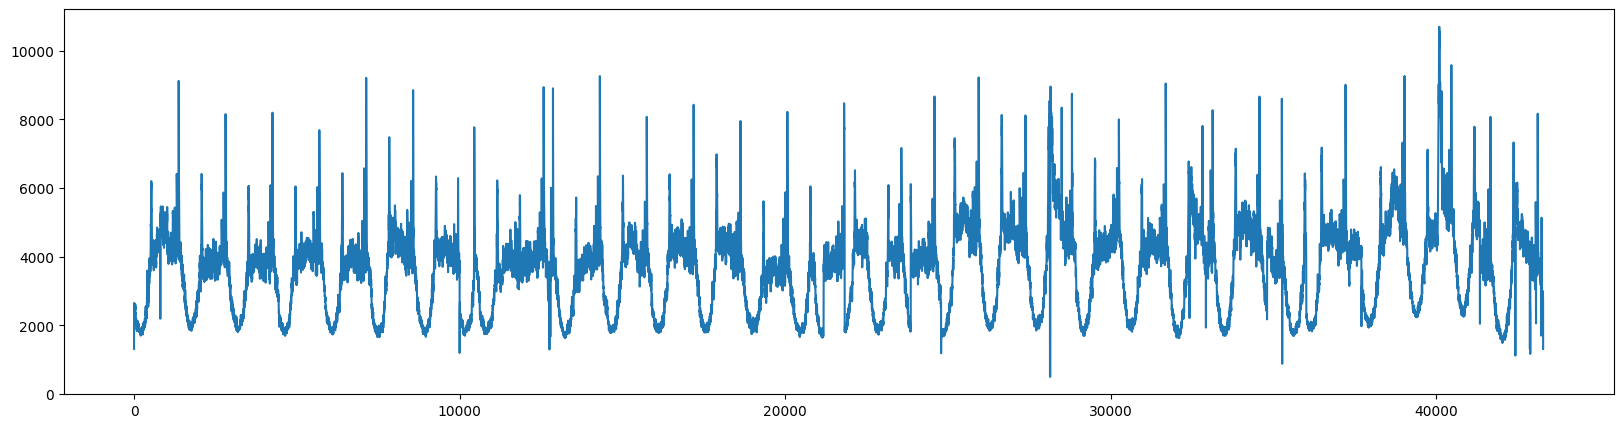

In [134]:
prediction = pd.DataFrame(
    {
        'Прогноз': y_train_scores
    },
    index=data.loc[X_train.index, 'point'],
).sort_index()

plt.figure(figsize=(20, 5))

# plt.plot(prediction)
plt.plot(X_train.values)

plt.show()

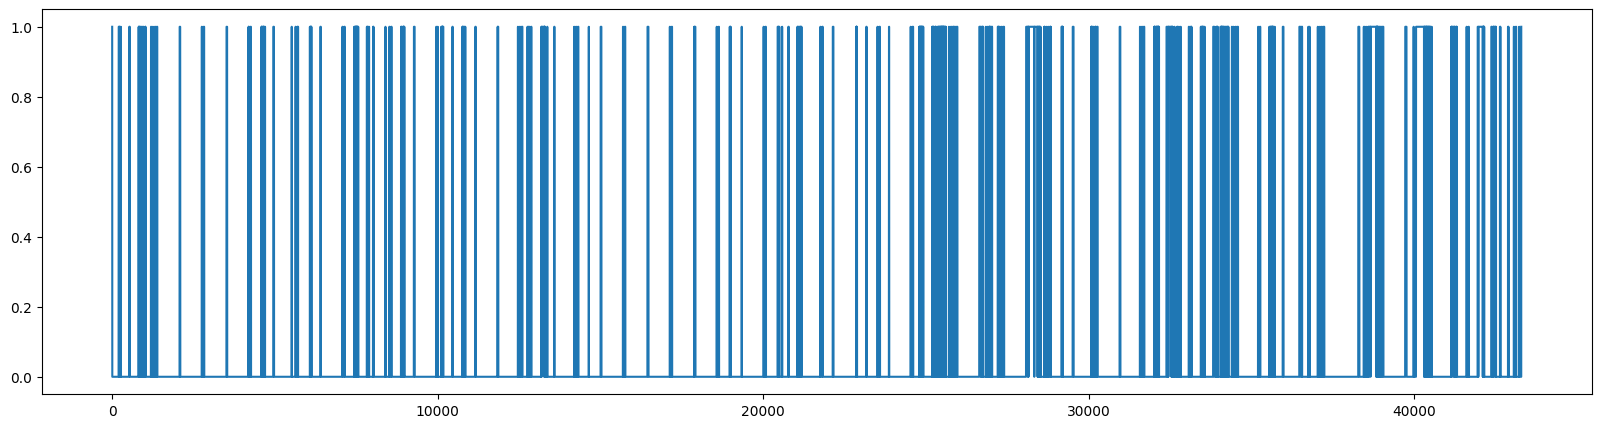

In [135]:
plt.figure(figsize=(20, 5))

plt.plot(y_train_pred)
# plt.plot(X_train.values)

plt.show()

In [105]:
from pyod.utils.example import visualize

Number of inliers: 150
Number of outliers: 50
Ground truth shape is (200,). Outlier are 1 and inliers are 0.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 

Model 1 Angle-based Outlier Detector (ABOD)
Model 2 K Nearest Neighbors (KNN)
Model 3 Average KNN
Model 4 Median KNN
Model 5 Local Outlier Factor (LOF)
Model 6 Isolation Forest

1 fitting Angle-based Outlier Detector (ABOD)

2 fitting K Nearest Neighbors (KNN)

3 fitting Average KNN

4 fitting Median KNN

5 fitting Local Outlier Factor (LOF)

6 fitting Isolation Forest


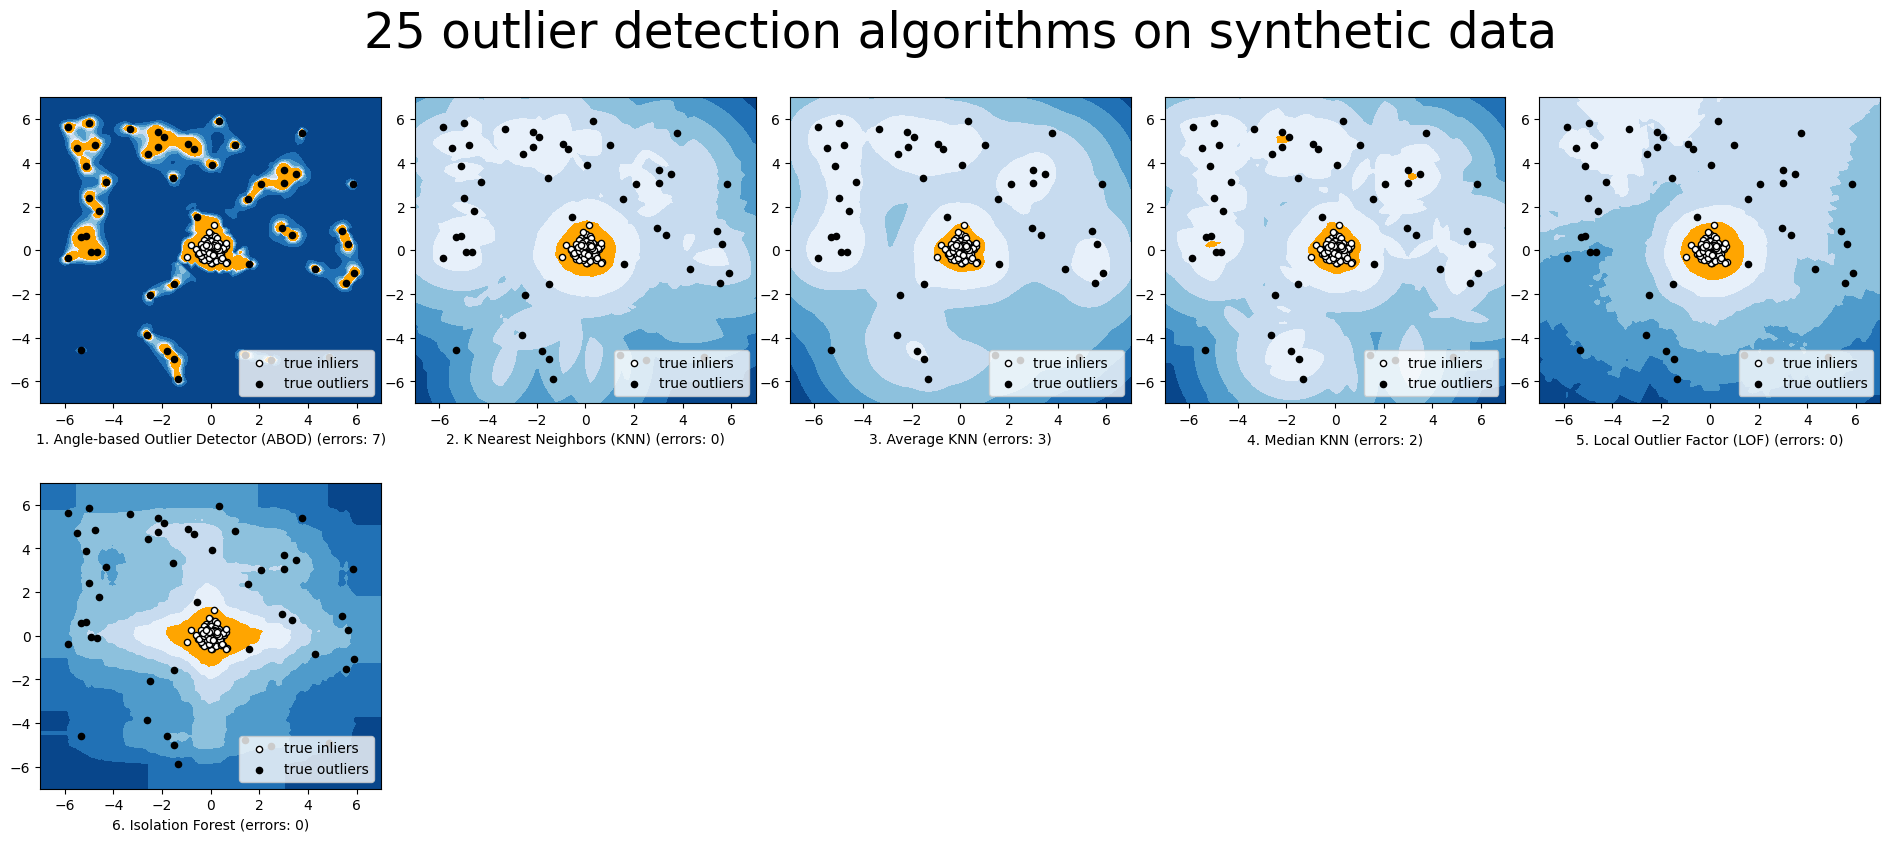

In [27]:
from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
	os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

# supress warnings for clean output
import warnings

warnings.filterwarnings("ignore")
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.models.inne import INNE
from pyod.models.gmm import GMM
from pyod.models.kde import KDE
from pyod.models.lmdd import LMDD

# from pyod.models.dif import DIF
# from pyod.models.copod import COPOD
# from pyod.models.ecod import ECOD
# from pyod.models.suod import SUOD
# from pyod.models.qmcd import QMCD
# from pyod.models.sampling import Sampling
# from pyod.models.kpca import KPCA
# from pyod.models.lunar import LUNAR

# TODO: add neural networks, LOCI, SOS, COF, SOD

# Define the number of inliers and outliers
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
				 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
				 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
				 LOF(n_neighbors=50)]

# Show the statics of the data
print('Number of inliers: %i' % n_inliers)
print('Number of outliers: %i' % n_outliers)
print(
	'Ground truth shape is {shape}. Outlier are 1 and inliers are 0.\n'.format(
		shape=ground_truth.shape))
print(ground_truth, '\n')

random_state = 42
# Define nine outlier detection tools to be compared
classifiers = {
	'Angle-based Outlier Detector (ABOD)':
		ABOD(contamination=outliers_fraction),
	'K Nearest Neighbors (KNN)': KNN(
		contamination=outliers_fraction),
	'Average KNN': KNN(method='mean',
					   contamination=outliers_fraction),
	'Median KNN': KNN(method='median',
					  contamination=outliers_fraction),
	'Local Outlier Factor (LOF)':
		LOF(n_neighbors=35, contamination=outliers_fraction),

	'Isolation Forest': IForest(contamination=outliers_fraction,
								random_state=random_state),
	# 'Deep Isolation Forest (DIF)': DIF(contamination=outliers_fraction,
	# 								   random_state=random_state),
	# 'INNE': INNE(
	# 	max_samples=2, contamination=outliers_fraction,
	# 	random_state=random_state,
	# ),

	# 'Locally Selective Combination (LSCP)': LSCP(
	# 	detector_list, contamination=outliers_fraction,
	# 	random_state=random_state),
	# 'Feature Bagging':
	# 	FeatureBagging(LOF(n_neighbors=35),
	# 				   contamination=outliers_fraction,
	# 				   random_state=random_state),
	# 'SUOD': SUOD(contamination=outliers_fraction),

	# 'Minimum Covariance Determinant (MCD)': MCD(
	# 	contamination=outliers_fraction, random_state=random_state),

	# 'Principal Component Analysis (PCA)': PCA(
	# 	contamination=outliers_fraction, random_state=random_state),
	# 'KPCA': KPCA(
	# 	contamination=outliers_fraction),

	# 'Probabilistic Mixture Modeling (GMM)': GMM(contamination=outliers_fraction,
	# 											random_state=random_state),

	# 'LMDD': LMDD(contamination=outliers_fraction,
	# 			 random_state=random_state),

	# 'Histogram-based Outlier Detection (HBOS)': HBOS(
	# 	contamination=outliers_fraction),

	# 'Copula-base Outlier Detection (COPOD)': COPOD(
	# 	contamination=outliers_fraction),

	# 'ECDF-baseD Outlier Detection (ECOD)': ECOD(
	# 	contamination=outliers_fraction),
	# 'Kernel Density Functions (KDE)': KDE(contamination=outliers_fraction),

	# 'QMCD': QMCD(
	# 	contamination=outliers_fraction),

	# 'Sampling': Sampling(
	# 	contamination=outliers_fraction),

	# 'LUNAR': LUNAR(),

	# 'Cluster-based Local Outlier Factor (CBLOF)':
	# 	CBLOF(contamination=outliers_fraction,
	# 		  check_estimator=False, random_state=random_state),

	# 'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
}

# Show all detectors
for i, clf in enumerate(classifiers.keys()):
	print('Model', i + 1, clf)

# Fit the models with the generated data and
# compare model performances
for i, offset in enumerate(clusters_separation):
	np.random.seed(42)
	# Data generation
	X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
	X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
	X = np.r_[X1, X2]
	# Add outliers
	X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

	# Fit the model
	plt.figure(figsize=(20, 22))
	for i, (clf_name, clf) in enumerate(classifiers.items()):
		print()
		print(i + 1, 'fitting', clf_name)
		# fit the data and tag outliers
		clf.fit(X)
		scores_pred = clf.decision_function(X) * -1
		y_pred = clf.predict(X)
		threshold = percentile(scores_pred, 100 * outliers_fraction)
		n_errors = (y_pred != ground_truth).sum()
		# plot the levels lines and the points

		Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
		Z = Z.reshape(xx.shape)
		subplot = plt.subplot(5, 5, i + 1)
		subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
						 cmap=plt.cm.Blues_r)
		# a = subplot.contour(xx, yy, Z, levels=[threshold],
		#                     linewidths=2, colors='red')
		subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
						 colors='orange')
		b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
							s=20, edgecolor='k')
		c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
							s=20, edgecolor='k')
		subplot.axis('tight')
		subplot.legend(
			[
				# a.collections[0],
				b, c],
			[
				# 'learned decision function',
				'true inliers', 'true outliers'],
			prop=matplotlib.font_manager.FontProperties(size=10),
			loc='lower right')
		subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
		subplot.set_xlim((-7, 7))
		subplot.set_ylim((-7, 7))
	plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
	plt.suptitle("25 outlier detection algorithms on synthetic data",
				 fontsize=35)
plt.savefig('ALL.png', dpi=300, bbox_inches='tight')
plt.show()

# Текущие вопросы

1) Зачем использовать Apdex - если на графиках он везде около 1 (0.999, 0.998)
2) Какую дискретность используется при расчёте своих метрик?
3) Тестироваться будем на этом же наборе данных?
4) Почему нельзя повторить графики из примера?
5) Для работы нам следует использовать только приложения HttpDispatcher, Errors/allWeb и Apdex
6) Какие приложения важны?